# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

import cv2 as cv
print("Open CV Version :"+cv.__version__)

from PIL import Image

# To be able to use Warning
import warnings
import os
import shutil
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input
from keras.applications import *
from keras.applications.xception import decode_predictions
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
from keras.layers.core import Dropout

import tensorflow as tf
print("Keras Version : "+tf.keras.__version__)
print("Tensorflow Version : "+tf.__version__)

Python Version :sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.5
Seaborn Version :0.10.1
Open CV Version :3.4.2


Using TensorFlow backend.


Keras Version : 2.2.4-tf
Tensorflow Version : 2.1.0


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on
# picture_directory = './Flipkart/Images-CNNBackup/'
picture_directory = './Flipkart/Images-CNNTransferNew/'
input_df = pd.read_csv('./DataSet.csv', sep=",", header=0)
main_categories = input_df['product_main_category'].unique()
number_of_categories = input_df['product_main_category'].nunique()

In [3]:
input_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_main_category,test,revamped_brand,clean_product_specifications,titi,clean_description,clean_concat
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Elegance,elegance,"['brand', 'elegance', 'designed', 'door', 'typ...",Brand Elegance Designed For Door Type Eyelet M...,"['feature', 'elegance', 'polyester', 'multicol...",elegance brand elegance designed door type eye...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Sathiyas,sathiyas,"['machine', 'washable', 'material', 'cotton', ...",Machine Washable Yes Material Cotton Design Se...,"['specification', 'sathiyas', 'cotton', 'bath'...",sathiyas machine washable material cotton desi...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Eurospa,eurospa,"['material', 'cotton', 'terry', 'design', 'shu...",Material Cotton Terry Design SHUVAM Brand Euro...,"['feature', 'eurospa', 'cotton', 'terry', 'fac...",eurospa material cotton terry design shuvam br...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,Santosh Royal Fashion Cotton Printed King Size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,SANTOSH ROYAL FASHION,santosh royal fashion,"['brand', 'santosh', 'royal', 'fashion', 'mach...",Brand SANTOSH ROYAL FASHION Machine Washable Y...,"['feature', 'santosh', 'royal', 'fashion', 'co...",santosh royal fashion brand santosh royal fash...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King Sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Jaipur Print,jaipur print,"['machine', 'washable', 'brand', 'jaipur', 'pr...",Machine Washable Yes Brand Jaipur Print Type F...,"['feature', 'jaipur', 'print', 'cotton', 'flor...",jaipur print machine washable brand jaipur pri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids 

### Resize of the pictures

In [ ]:
def resize(img):
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
def save_resizedimage(imagename):
    imagetoresize = cv.imread(picture_directory+imagename)
    imagetoresize = resize(imagetoresize)
    print(imagename)
    cv.imwrite(picture_directory+imagename.split('.jpg')[0]+'_resized.jpg', imagetoresize)

In [ ]:
# input_df['image'].apply(save_resizedimage)

### Pre_trained CNN

In [ ]:
model = Xception(weights='imagenet', include_top=True)

In [ ]:
for category in main_categories:
    print(category)
    # input_df.loc[category, 'product_main_category']
    image_name = input_df.loc[input_df['product_main_category'] == category].iloc[1]['image']
    print(image_name + " in category " + category)
    picture_name = cv.imread(picture_directory+image_name)
    # plt.imshow(picture_name)
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Original Picture '+image_name, fontsize=12)
    ax.imshow(picture_name)
    img = load_img(picture_directory+image_name.split('.jpg')[0]+'_resized.jpg', target_size=(150, 150))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
    img = preprocess_input(img)  
    predictions = model.predict(img)
    print("Predictions " + (str)(decode_predictions(predictions, top=5)))

In [ ]:
# decode_predictions(predictions,top=5)

### Transfer Learning

###### The images are moved in a specific directory by category

Creation of the directories

In [ ]:
main_categories = np.char.rstrip(main_categories.astype(str))

In [ ]:
print(main_categories.sort())

In [4]:
main_categories = ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches']

In [ ]:
# for directory_name in main_categories:
  #  print(directory_name)
  #  os.mkdir(picture_directory + directory_name)

In [ ]:
# for _, row in input_df.iterrows():
    # print(row['image'].split('.jpg')[0]+'_resized.jpg' + " " + row['product_main_category'].rstrip())
    # shutil.move(picture_directory + row['image'].split('.jpg')[0] + '_resized.jpg', picture_directory + row['product_main_category'].rstrip() + '/' + row['image'].split('.jpg')[0] + '_resized.jpg' )

In [ ]:
main_categories

In [5]:
batch_size = 2

In [6]:
# picture_directory = './Flipkart/Images-CNN/'

In [7]:
# model = Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
# model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3), alpha=0.35)

model.trainable = False
x = model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
# Ajouter la nouvelle couche fully-connected pour la classification 7 classes
predictions = Dense(number_of_categories, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# Ne pas entraîner les 5 premières couches (les plus basses)
# for layer in model.layers[:5]:
  #   layer.trainable = False

In [8]:
print(new_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
____________________________________________________________________________________________

In [9]:
transformation_ratio = .05
train_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range=transformation_ratio, shear_range=transformation_ratio, zoom_range=transformation_ratio, cval=transformation_ratio, horizontal_flip=True, vertical_flip=True, validation_split=0.2)
# train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

2:201: E501 line too long (247 > 200 characters)


In [10]:
callbacks_list = [ModelCheckpoint(picture_directory+'weights/', monitor='val_acc', verbose=1, save_best_only=True), EarlyStopping(monitor='val_acc', patience=5, verbose=0)]

In [11]:
train_generator = train_datagen.flow_from_directory(picture_directory+'train/', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='training')

Found 560 images belonging to 7 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(picture_directory+'train/', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='validation')

1:201: E501 line too long (203 > 200 characters)


Found 140 images belonging to 7 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(picture_directory+'test/', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, shuffle=False)

Found 350 images belonging to 7 classes.


In [14]:
print("In train_generator ")
for cat in range(len(train_generator.class_indices)):
    print(main_categories[cat], ":\t", list(train_generator.classes).count(cat))
print("")
print("In validation_generator ")
for cat in range(len(validation_generator.class_indices)):
    print(main_categories[cat], ":\t", list(validation_generator.classes).count(cat))
print("")
print("In test_generator ")
for cat in range(len(test_generator.class_indices)):
    print(main_categories[cat], ":\t", list(test_generator.classes).count(cat))

In train_generator 
Baby Care :	 80
Beauty and Personal Care :	 80
Computers :	 80
Home Decor & Festive Needs :	 80
Home Furnishing :	 80
Kitchen & Dining :	 80
Watches :	 80

In validation_generator 
Baby Care :	 20
Beauty and Personal Care :	 20
Computers :	 20
Home Decor & Festive Needs :	 20
Home Furnishing :	 20
Kitchen & Dining :	 20
Watches :	 20

In test_generator 
Baby Care :	 50
Beauty and Personal Care :	 50
Computers :	 50
Home Decor & Festive Needs :	 50
Home Furnishing :	 50
Kitchen & Dining :	 50
Watches :	 50


In [15]:
train_generator.reset()
validation_generator.reset()
# Compiler le modèle
# new_model.compile(loss="categorical_crossentropy", optimizer='nadam', metrics=["accuracy"])
# new_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
# new_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])
new_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [16]:
# Entraîner sur les données d'entraînement (X_train, y_train)
# model_info = new_model.fit_generator(train_generator, validation_data=validation_generator, epochs=2, verbose=5, callbacks=callbacks_list)
model_info = new_model.fit_generator(train_generator, validation_data=validation_generator, epochs=30, verbose=2, callbacks=callbacks_list)

Epoch 1/30
 - 183s - loss: 1.9262 - accuracy: 0.2714 - val_loss: 0.8146 - val_accuracy: 0.3857
Epoch 2/30
 - 155s - loss: 1.5956 - accuracy: 0.4214 - val_loss: 1.8174 - val_accuracy: 0.4500
Epoch 3/30
 - 166s - loss: 1.4683 - accuracy: 0.4768 - val_loss: 0.3960 - val_accuracy: 0.5286
Epoch 4/30
 - 157s - loss: 1.3514 - accuracy: 0.5125 - val_loss: 3.9346 - val_accuracy: 0.5857
Epoch 5/30
 - 156s - loss: 1.2564 - accuracy: 0.5661 - val_loss: 0.0131 - val_accuracy: 0.6214
Epoch 6/30
 - 156s - loss: 1.2283 - accuracy: 0.5929 - val_loss: 0.0950 - val_accuracy: 0.6071
Epoch 7/30
 - 160s - loss: 1.2284 - accuracy: 0.5750 - val_loss: 2.5158 - val_accuracy: 0.6643
Epoch 8/30
 - 158s - loss: 1.1397 - accuracy: 0.6018 - val_loss: 1.6497 - val_accuracy: 0.6429
Epoch 9/30
 - 157s - loss: 1.1029 - accuracy: 0.6393 - val_loss: 1.4554 - val_accuracy: 0.6857
Epoch 10/30
 - 161s - loss: 1.0243 - accuracy: 0.6429 - val_loss: 0.2568 - val_accuracy: 0.7071
Epoch 11/30
 - 158s - loss: 0.9965 - accuracy: 0.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


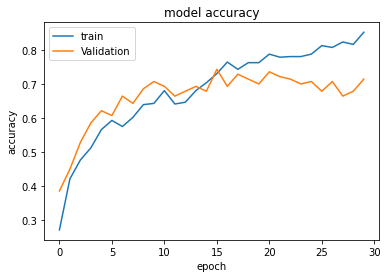

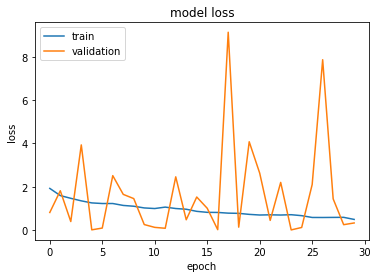

In [17]:
# list all data in history
print(model_info.history.keys())
# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
validation_generator.reset()
score = new_model.evaluate_generator(validation_generator, (validation_generator.samples + (batch_size - 1)) // batch_size)
print("For validation data set; Loss: ", score[0], " Accuracy: ", score[1])

For validation data set; Loss:  0.050112009048461914  Accuracy:  0.7142857313156128


In [19]:
test_generator.reset()
score = new_model.evaluate_generator(train_generator, (test_generator.samples + (batch_size-1)) // batch_size)
print("For test data set; Loss: ",score[0]," Accuracy: ", score[1])

3:34: E231 missing whitespace after ','
3:43: E231 missing whitespace after ','


For test data set; Loss:  0.0817001536488533  Accuracy:  0.8942857384681702


In [20]:

# num_of_test_samples = 348

test_generator.reset()

testStep = (test_generator.samples + (batch_size-1)) // batch_size
print("testStep: ", testStep)
# Confusion Matrix and Classification Report
# Y_pred = new_model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)

testStep:  175


In [27]:
Y_pred = new_model.predict_generator(test_generator, steps=testStep, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print(str(len(y_pred)))
labels = (validation_generator.class_indices)
print("Labels "+(str)(labels))
labels = dict((v, k) for k, v in labels.items())
print(labels)
predictedLabels = [labels[k] for k in y_pred]
print("Predicted Labels "+(str)(predictedLabels))
len(predictedLabels)
actualLabels = [labels[k] for k in test_generator.classes]
print("Actual Labels "+(str)(actualLabels))
len(actualLabels)
print("Accuracy Score"+(str)(accuracy_score(actualLabels, predictedLabels)))
print('Confusion Matrix')
print(confusion_matrix(actualLabels, predictedLabels))
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
# target_names = ['Cats', 'Dogs', 'Horse']
target_names = main_categories
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

[3 3 0 4 3 0 3 3 0 0 0 0 0 3 3 0 5 0 0 0 5 3 4 4 0 0 0 0 0 3 0 0 0 0 3 4 0
 4 0 3 3 0 0 4 3 3 3 0 0 1 5 1 1 1 1 2 1 2 1 1 4 1 1 3 1 6 1 3 1 1 4 5 1 1
 3 1 1 2 1 1 1 1 2 3 1 1 1 4 1 3 1 1 1 1 1 2 1 0 1 1 2 2 3 2 2 2 2 2 1 2 3
 2 2 2 4 3 2 4 2 2 2 2 3 2 2 2 5 2 3 2 2 2 0 2 2 2 3 2 2 5 2 5 2 2 3 2 2 2
 1 2 3 3 3 3 4 3 3 0 3 3 3 3 3 6 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 5 3 3 5 3 3 0 3 0 3 3 4 3 4 0 2 4 3 0 0 4 4 4 0 4 4 0 4 4 4 4 4 3 4 4
 4 6 4 4 4 4 4 4 0 3 4 0 0 5 4 0 4 3 4 2 3 4 4 0 4 3 4 4 5 5 5 5 1 5 3 5 5
 3 5 2 5 5 5 5 5 5 5 5 3 2 5 5 5 2 5 5 3 0 2 5 5 5 2 5 5 1 5 5 5 2 5 5 5 5
 0 5 5 5 6 6 6 6 0 6 5 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 3 6 6 6 3 6 6 6 6 6 6 6 6 6]
350
Labels {'Baby Care': 0, 'Beauty and Personal Care': 1, 'Computers': 2, 'Home Decor & Festive Needs': 3, 'Home Furnishing': 4, 'Kitchen & Dining': 5, 'Watches': 6}
{0: 'Baby Care', 1: 'Beauty and Personal Care', 2: 'Computers', 3: 'Home Decor & Festive Needs', 4: 'Home Furnishing', 5: 

ValueError: Found input variables with inconsistent numbers of samples: [140, 350]

In [ ]:
actualLabels

In [ ]:
predictedLabels

In [ ]:
accuracy_score(actualLabels, predictedLabels)

In [22]:
confusion_matrix(actualLabels, predictedLabels)

array([[26,  1,  0, 15,  6,  2,  0],
       [ 1, 33,  5,  5,  3,  2,  1],
       [ 1,  2, 35,  7,  2,  3,  0],
       [ 3,  0,  2, 40,  2,  2,  1],
       [10,  0,  2,  6, 30,  1,  1],
       [ 2,  2,  6,  4,  0, 36,  0],
       [ 2,  0,  0,  2,  0,  1, 45]])

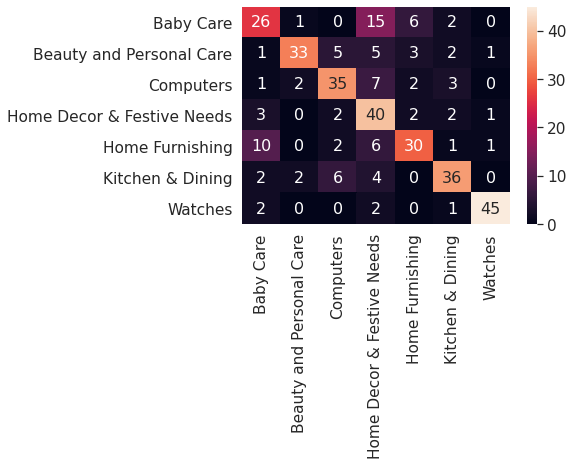

3:24: E261 at least two spaces before inline comment
4:55: E261 at least two spaces before inline comment


In [23]:
df_cm = pd.DataFrame(confusion_matrix(actualLabels, predictedLabels), main_categories, main_categories)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [26]:
print(classification_report(actualLabels, predictedLabels))

                            precision    recall  f1-score   support

                 Baby Care       0.58      0.52      0.55        50
  Beauty and Personal Care       0.87      0.66      0.75        50
                 Computers       0.70      0.70      0.70        50
Home Decor & Festive Needs       0.51      0.80      0.62        50
           Home Furnishing       0.70      0.60      0.65        50
          Kitchen & Dining       0.77      0.72      0.74        50
                   Watches       0.94      0.90      0.92        50

                  accuracy                           0.70       350
                 macro avg       0.72      0.70      0.70       350
              weighted avg       0.72      0.70      0.70       350

